In [1]:
import numpy as np
import torch, os
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.manifold import TSNE

In [2]:
## Load data and model
# Find all z_sample in Decoded_data

file_list = os.listdir('Decoded_data')
z_samples = {}

for file in file_list:
    if file.endswith('.npy'):
        z_sample = np.load(os.path.join('Decoded_data', file))
        z_samples[file] = z_sample
print(f"Loaded {len(z_samples)} z_sample files.")

Loaded 5 z_sample files.


In [3]:
comp = 2
random_seed = 42

tsne_samples = {}
for key, z_sample in z_samples.items():
    print(f"Processing {key} with shape {z_sample.shape}")
    tsne_i = TSNE(n_components=comp, random_state=random_seed)
    z_sample_2d = tsne_i.fit_transform(z_sample)
    tsne_samples[key] = z_sample_2d


Processing z_samples_kde.npy with shape (27008, 256)
Processing z_samples_gmm.npy with shape (27008, 256)
Processing z_samples_ran.npy with shape (27008, 256)
Processing z_samples_kde_optimized.npy with shape (10000, 256)
Processing z_sample_NewICSD_test.npy with shape (27008, 256)


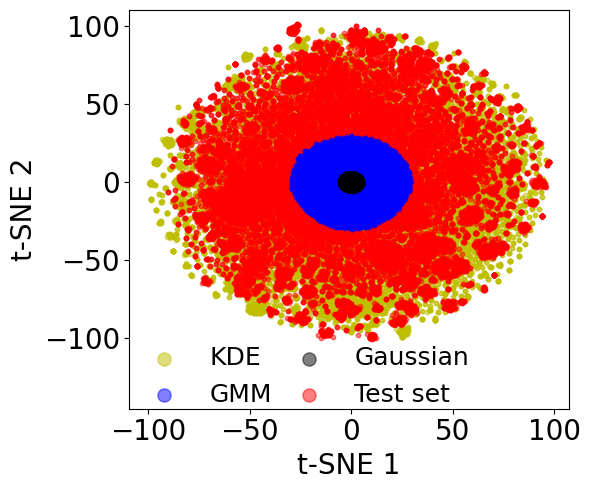

In [19]:
# Plot the latent space in one plot
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
font_size = 20
marker = 'o'
color_list = {'kde':'y','test':'r','gmm':'b','ran':'k'}
alpha = 0.5
font = 18
label = {'test':'Test set','kde':'KDE','gmm':'GMM','ran':'Gaussian'}
z_order = {'test': 2, 'kde': 1, 'gmm': 3, 'ran': 4}
count = 0
for key, z_sample_2d in tsne_samples.items():
    name = key.split('.')[0].split('_')[-1]
    if name == 'optimized':
        continue  # Skip optimized samples
    if name in label:
        label_name = label[name]
    else:
        label_name = name
    ax.scatter(z_sample_2d[:, 0], z_sample_2d[:, 1],
               label=label_name,
               marker=marker,
               color=color_list[name],
               alpha=alpha,
               s=10,zorder=z_order[name])
    count += 1

ax.set_xlabel('t-SNE 1', fontsize=font_size)
ax.set_ylabel('t-SNE 2', fontsize=font_size)
#ax.set_title('Latent space', fontsize=font_size)
ax.tick_params(axis='both', which='major', labelsize=font_size)
ax.tick_params(axis='both', which='minor', labelsize=font_size)
ax.legend(loc=(0,-0.02),fontsize=font_size-2,ncols=2,markerscale=3.,frameon=False,columnspacing=0.5)
ax.set_ylim(-145,110)
plt.tight_layout()